# Initial Coding Project

### Introduction

My code currently:

- Imports the pandas, numpy, matplotlib, seaborn, scipy, kneed, and math modules
- Reads in the provided csv files and gives each column appropriate headers
- Cleans any missing data
- Saves cleaned data into a new csv file
- Finds the number of data points, mean, standard deviation, min, max, and quartiles of the data
- Checks type of data point, ensures it's 'float' and displays memory usage
- Finds the Pearson correlation coefficient between the variables
- Displays a plot of the data using Matplotlib
- Strips data points where $t<0$ and then plots a linear regression using Seaborn
- Converts the current to a logarithmic scale
- Attempts to plot the logarithmic current against time with a knee detection algorithm (but currently fails to either plot logarithmically or find a knee)


Firstly let's install kneed onto our system to ensure we have all the necessary programs. The same code can be used to install any Python module by replacing 'kneed' with 'numpy' etc.

In [31]:
import sys
!{sys.executable} -m pip install kneed    # Installs kneed if you don't already have it installed.

Invalid requirement: '#'
Traceback (most recent call last):
  File "C:\Users\bluse\Anaconda3\lib\site-packages\pip\_vendor\packaging\requirements.py", line 93, in __init__
    req = REQUIREMENT.parseString(requirement_string)
  File "C:\Users\bluse\Anaconda3\lib\site-packages\pip\_vendor\pyparsing.py", line 1632, in parseString
    raise exc
  File "C:\Users\bluse\Anaconda3\lib\site-packages\pip\_vendor\pyparsing.py", line 1622, in parseString
    loc, tokens = self._parse( instring, 0 )
  File "C:\Users\bluse\Anaconda3\lib\site-packages\pip\_vendor\pyparsing.py", line 1379, in _parseNoCache
    loc,tokens = self.parseImpl( instring, preloc, doActions )
  File "C:\Users\bluse\Anaconda3\lib\site-packages\pip\_vendor\pyparsing.py", line 3395, in parseImpl
    loc, exprtokens = e._parse( instring, loc, doActions )
  File "C:\Users\bluse\Anaconda3\lib\site-packages\pip\_vendor\pyparsing.py", line 1379, in _parseNoCache
    loc,tokens = self.parseImpl( instring, preloc, doActions )
  File "

Let's import all of the necessary modules for using the code:

In [250]:
import pandas as pd                         # Imports modules which will be used throughout the code.
import numpy as np                          
import matplotlib                           
from matplotlib import pyplot as plt        
import seaborn as sns                       
from scipy import stats                     
from kneed import KneeLocator               
import math

This code takes your csv file and reads it into the dataframe 'df'. It assigns headers to each of the columns and checks for any values with '?' (a common value assigned by machines when data collection fails so a backstop) and replaces them with 'NaN' (Not a Number) values for computing power. These NaN values are then eliminated from the data for cleaning.

In [251]:
filename = "D:/MSci Project Data/Test Data.csv"  # Insert path to your file here (can be a link to an online dataset)

df = pd.read_csv(filename, header=None, names=["Time", "Current"])     # Reads the data frame (df) ready for analysis and
                                            # assumes there are no headers in the data. If there are headers in the data 
                                            # delete "headers = None, names = ["Time", "Current"]".
        
df1 = df.replace('?', np.NaN)               # Replaces unknown values using '?' with 'NaN' for computing efficiency
                                            # improvements
df1.dropna()                                # Removes datapoints without number values

,Time,Current
0,-0.000051,0.032792
1,-0.000051,0.033333
2,-0.000051,0.034042
3,-0.000051,0.033552
4,-0.000051,0.033281
5,-0.000051,0.033406
6,-0.000051,0.033969
7,-0.000051,0.033969
8,-0.000051,0.033625
9,-0.000051,0.033365


Let's look at the first and last 5 data points of our dataframe:

In [252]:
print(df1.head(5))
print(" ")
print(df1.tail(5))

       Time   Current
0 -0.000051  0.032792
1 -0.000051  0.033333
2 -0.000051  0.034042
3 -0.000051  0.033552
4 -0.000051  0.033281
 
           Time   Current
9996   0.000449  0.034646
9997   0.000449  0.034427
9998   0.000449  0.034406
9999   0.000449  0.034406
10000  0.000449  0.034406


Since the data seems to have been cleaned and given column titles successfully, let's save our data to a new csv file which we can use for further analysis:

In [253]:
df1.to_csv("C:/Users/bluse/PycharmProjects/MSciProject/corrected_testdata.csv", index=False)

Now let's ensure that our data is of the correct type, correct it if it is not, and check the memory usage of the dataframe:

In [254]:
print("Information about the data:")                # Provides the number of data points, whether there are null data points,
                                                    # the data types, and the memory usage of the dataframe
print(" ")
print(df1.info())

df1["Time"] = df1["Time"].astype("float")           # Sets the data to datatype 'float64' if it isn't already in this form
df1["Current"] = df1["Current"].astype("float")
df1.reset_index(drop = True, inplace = True)        # Resets the index of the dataframe to avoid confusion

print(" ")
print("The datatypes of each column:")
print(df1.dtypes)                                   # Checks the new datatypes of the columns

Information about the data:
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 2 columns):
Time       10001 non-null float64
Current    10001 non-null float64
dtypes: float64(2)
memory usage: 156.3 KB
None
 
The datatypes of each column:
Time       float64
Current    float64
dtype: object


Now we can do some quick and easy data analysis just to get an idea of trends within the data (which we will be able to see easily when we plot the data but this is easy analysis and doesnt take much time):

In [255]:
print("A quick statistical description of the data set:")
print(" ")
print(df1.describe(include = "all"))

A quick statistical description of the data set:
 
               Time       Current
count  10001.000000  10001.000000
mean       0.000199      0.049764
std        0.000144      0.018159
min       -0.000051      0.032156
25%        0.000074      0.035990
50%        0.000199      0.041260
75%        0.000324      0.059708
max        0.000449      0.168281


The data tells us that we have two columns of 'float64' values with no null values (we eliminated those earlier) with 10,001 values and that the data uses 156.3 KB of memory. This function can be used on a variety of classes in Python - not just dataframes. Another easy piece of analysis we can perform is to find the Pearson correlation coefficient of the data:

In [256]:
print("Pearson correlation table between the two variables:")
print(" ")
print(df1.corr())

Pearson correlation table between the two variables:
 
             Time   Current
Time     1.000000 -0.582288
Current -0.582288  1.000000


This tells us we have a moderately strong negative correlation between the two variables (which we shall see is true when we plot the data). Let us now plot the data using a scatter plot in Matplotlib:

Scatter plot of the data using matplotlib:


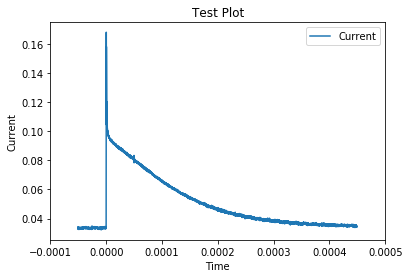

In [257]:
print("Scatter plot of the data using matplotlib:")
plt.figure()
plt.plot(df1["Time"], df1["Current"])
plt.title("Test Plot")
plt.xlabel("Time")
plt.ylabel("Current")
plt.legend()
plt.xlim([-0.0001,0.0005])
plt.show()

We notice a dark energy of roughly 0.025 on this graph which might be useful to know for the preparation of the data for the addition of logarithmic axes but will not be helpful for our initial linear regression plot so I will now remove all values of data with $t<0$:

In [258]:
with open("C:/Users/bluse/PycharmProjects/MSciProject/corrected_testdata.csv", 'r') as f:
    with open("C:/Users/bluse/PycharmProjects/MSciProject/corrected_testdata_2.csv", 'w') as g:
        for row in f:
            if row[0] != '-':
                g.write(row)
                
# The above section reads the first corrected file and writes a new csv file containing no values where the first character
# is '-' thereby removing all negative values. This means we can still access the data with negative values whilst also
# having cleaned the initial data.

df2 = pd.read_csv("C:/Users/bluse/PycharmProjects/MSciProject/corrected_blah_2.csv") # A new dataframe is created.

print(df2.head(5))

           Time   Current
0  8.190000e-19  0.153375
1  5.000000e-08  0.168281
2  1.000000e-07  0.118823
3  1.500000e-07  0.118823
4  2.000000e-07  0.156917


Now (for fun and practice), let's plot a linear regression curve of this new dataframe:

C:\Users\bluse\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 0.0004716934149308236)

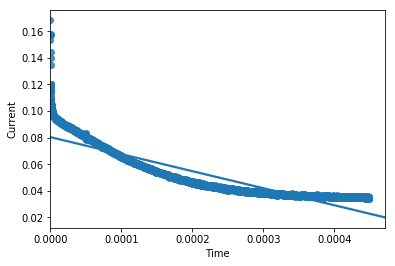

In [259]:
sns.regplot(x = "Time", y = "Current", data = df2)
plt.xlim(0,)

This cell takes the time and current columns in our dataframe and creates two new columns of data with each value being changed by the function $new data=log_{10}(old data)$:

In [260]:
darkenergy = 0.0335
df2['Current'] -= darkenergy 
df2['Log Time'] = np.log10(df2["Time"])
df2['Log Current'] = np.log10(df2["Current"])
print("DF2 Head")
print(df2.head(5))

DF2 Head
           Time   Current   Log Time  Log Current
0  8.190000e-19  0.119875 -18.086716    -0.921271
1  5.000000e-08  0.134781  -7.301030    -0.870371
2  1.000000e-07  0.085323  -7.000000    -1.068934
3  1.500000e-07  0.085323  -6.823909    -1.068934
4  2.000000e-07  0.123417  -6.698970    -0.908625


Let's make a plot of this data:

Line plot of the data using matplotlib:


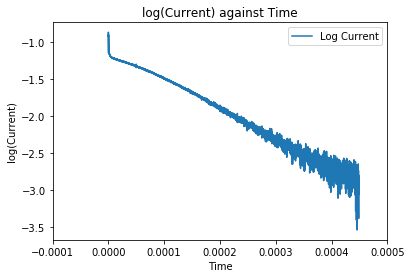

In [261]:
print("Line plot of the data using matplotlib:")
plt.figure()
plt.plot(df2["Time"], df2["Log Current"])
plt.title("log(Current) against Time")
plt.xlabel("Time")
plt.ylabel("log(Current)")
plt.legend()
plt.xlim([-0.0001,0.0005])
plt.show()

Let's test using a linear regression on this data:

C:\Users\bluse\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 0.0004716934149308236)

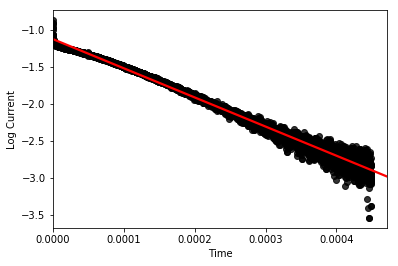

In [262]:
sns.regplot(x = "Time", y = "Log Current", data = df2, scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.xlim(0,)

           4             3             2
5.459e+11 x + 1.128e+10 x - 8.279e+06 x - 2312 x - 1.19


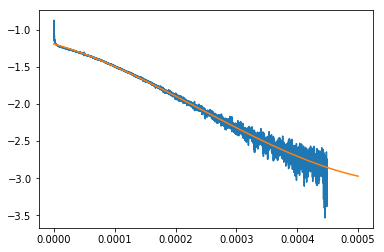

In [263]:
f = np.polyfit(df2["Time"], df2["Log Current"], 4)
p = np.poly1d(f)
print(p)

myline = np.linspace(0, 0.0005, 100)

plt.plot(df2["Time"], df2["Log Current"])
plt.plot(myline, p(myline))
plt.show()

This algorithm searches for the knee point in the data and then creates a crude plot of the knee point, firstly for the raw data and then for the data that has been transformed logarithmically. This clearly fails as the knee point is clearly not at the knee. I suspect removing the tail of the data might help mitigate this but I can't be sure yet.

Knee of the curve
8.190000000000001e-19
 
Elbow of the curve
8.190000000000001e-19
 
Current value of knee point
0.11987500000000001
None
 
Knee of the curve
0.000449
 
Elbow of the curve
0.000449
 
Current value of knee point
-3.042775942156835
None


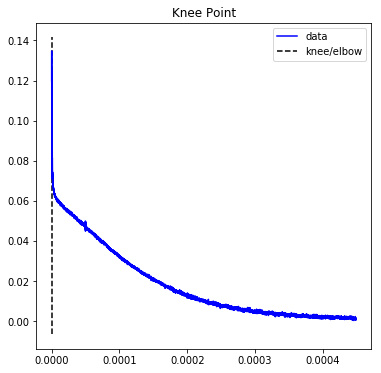

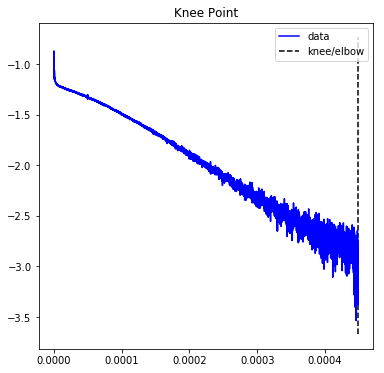

In [264]:
kneedle = KneeLocator(df2["Time"], df2["Current"], S=1.0, curve = "convex", direction = "decreasing")
print("Knee of the curve")

print(kneedle.knee)
print(" ")
print("Elbow of the curve")

print(kneedle.elbow)
print(" ")
print("Current value of knee point")

print(kneedle.knee_y)
print(kneedle.plot_knee())

kneedle_2 = KneeLocator(df2["Time"], df2["Log Current"], S=1.0, curve = "concave", direction = "decreasing")
print(" ")
print("Knee of the curve")

print(kneedle_2.knee)
print(" ")
print("Elbow of the curve")

print(kneedle_2.elbow)
print(" ")
print("Current value of knee point")

print(kneedle_2.knee_y)
print(kneedle_2.plot_knee())